# **1. Import Libraries & Load Dataset**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [15]:
# Load the dataset
df = pd.read_csv('/content/parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(percentage),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# **2 Data Analysis & Preprocessing**

In [16]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     195 non-null    object 
 1   MDVP:Fo(Hz)              195 non-null    float64
 2   MDVP:Fhi(Hz)             195 non-null    float64
 3   MDVP:Flo(Hz)             195 non-null    float64
 4   MDVP:Jitter(percentage)  195 non-null    float64
 5   MDVP:Jitter(Abs)         195 non-null    float64
 6   MDVP:RAP                 195 non-null    float64
 7   MDVP:PPQ                 195 non-null    float64
 8   Jitter:DDP               195 non-null    float64
 9   MDVP:Shimmer             195 non-null    float64
 10  MDVP:Shimmer(dB)         195 non-null    float64
 11  Shimmer:APQ3             195 non-null    float64
 12  Shimmer:APQ5             195 non-null    float64
 13  MDVP:APQ                 195 non-null    float64
 14  Shimmer:DDA 

In [17]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
name                       0
MDVP:Fo(Hz)                0
MDVP:Fhi(Hz)               0
MDVP:Flo(Hz)               0
MDVP:Jitter(percentage)    0
MDVP:Jitter(Abs)           0
MDVP:RAP                   0
MDVP:PPQ                   0
Jitter:DDP                 0
MDVP:Shimmer               0
MDVP:Shimmer(dB)           0
Shimmer:APQ3               0
Shimmer:APQ5               0
MDVP:APQ                   0
Shimmer:DDA                0
NHR                        0
HNR                        0
status                     0
RPDE                       0
DFA                        0
spread1                    0
spread2                    0
D2                         0
PPE                        0
dtype: int64


In [18]:
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(percentage),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


## **Visualize missing values**

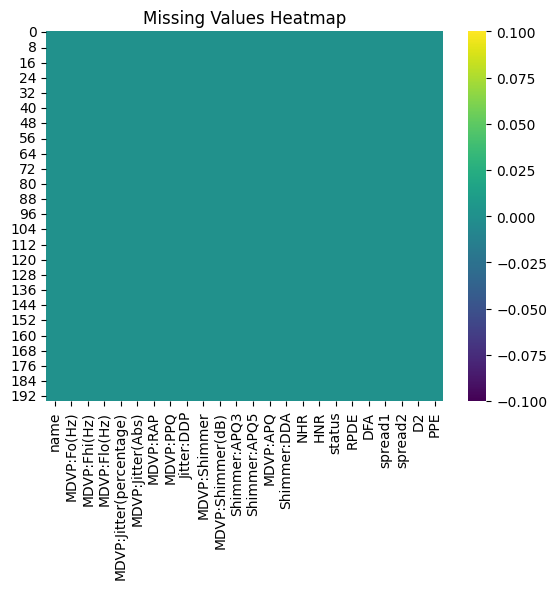

In [19]:
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## **Feature correlation**

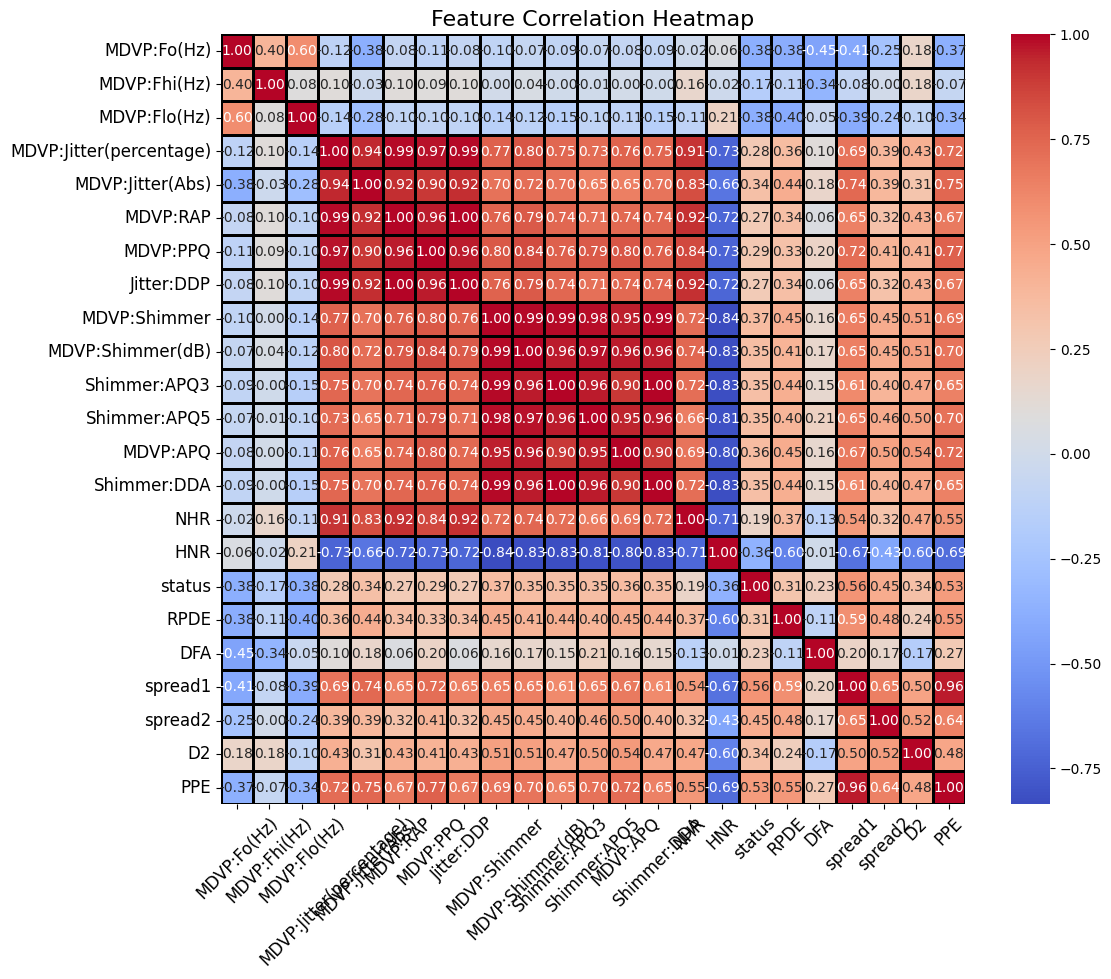

In [20]:
plt.figure(figsize=(12, 10))  # Increase figure size for better visibility
sns.heatmap(df.drop(columns=['name']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor="black")

plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for clarity
plt.yticks(fontsize=12)  # Increase y-axis label font size
plt.title('Feature Correlation Heatmap', fontsize=16)  # Increase title font size
plt.show()


# **3. Splitting Data**

In [21]:
X = df.drop(columns=['name', 'status'])
y = df['status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# **4. Model-1: Support Vector Machine**

Support Vector Machine Accuracy: 0.8974358974358975
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



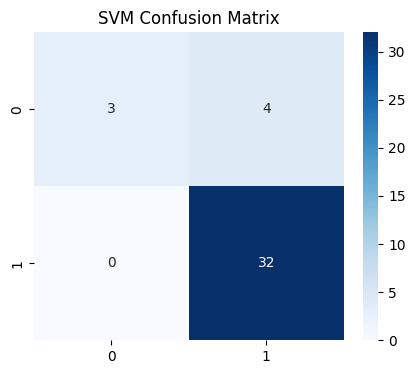

In [27]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()

# **5. Model-2: Logistic Regression**

Logistic Regression Accuracy: 0.8974358974358975
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



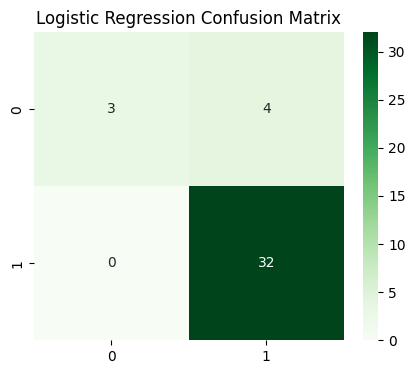

In [28]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:",accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap='Greens')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# **6. Model-3: Random Forest Classifier**

Random Forest Accuracy: 0.9487179487179487
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



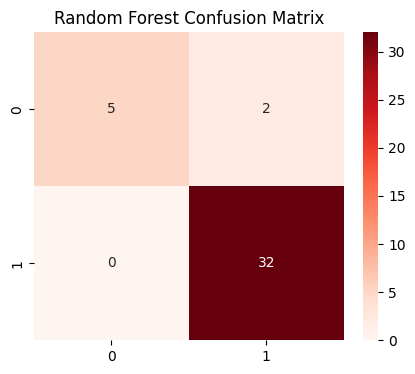

In [29]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:",accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap='Reds')
plt.title("Random Forest Confusion Matrix")
plt.show()


# **7. Model-4:  K-Neighbors Classifier**

KNeighborsClassifier Accuracy: 0.9487179487179487
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



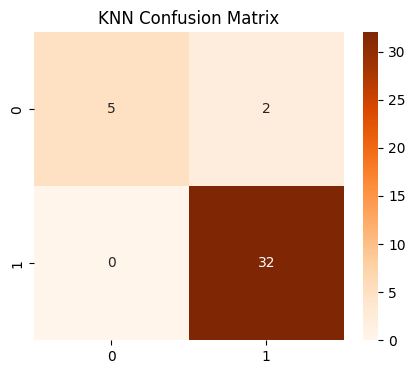

In [30]:

# K-Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNeighborsClassifier Accuracy:",accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap='Oranges')
plt.title("KNN Confusion Matrix")
plt.show()

 # **8. Model-5:  Decision Tree Classifier**

Decision Tree Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



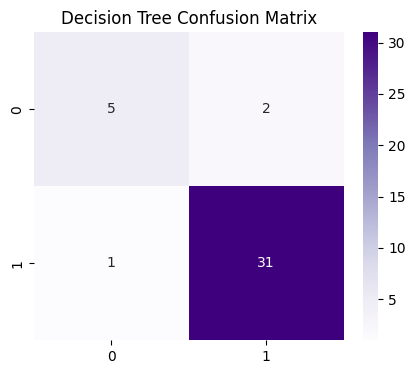

In [31]:

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:",accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap='Purples')
plt.title("Decision Tree Confusion Matrix")
plt.show()

# **9. Model Comparison & Best Model Selection**

In [34]:

models = {
    "Support Vector Machine": svm_model,
    "Logistic Regression": lr_model,
    "Random Forest": rf_model,
    "KNeighborsClassifier": knn_model,
    "Decision Tree": dt_model
}

accuracies = {
    "Support Vector Machine": accuracy_score(y_test, y_pred_svm),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "KNeighborsClassifier": accuracy_score(y_test, y_pred_knn),
    "Decision Tree": accuracy_score(y_test, y_pred_dt)
}

best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
with open("best_parkinsons_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

print(f'Best Model: {best_model_name} with Accuracy: {accuracies[best_model_name]:.2f}')


Best Model: Random Forest with Accuracy: 0.95


# **Comparison of ML Models**

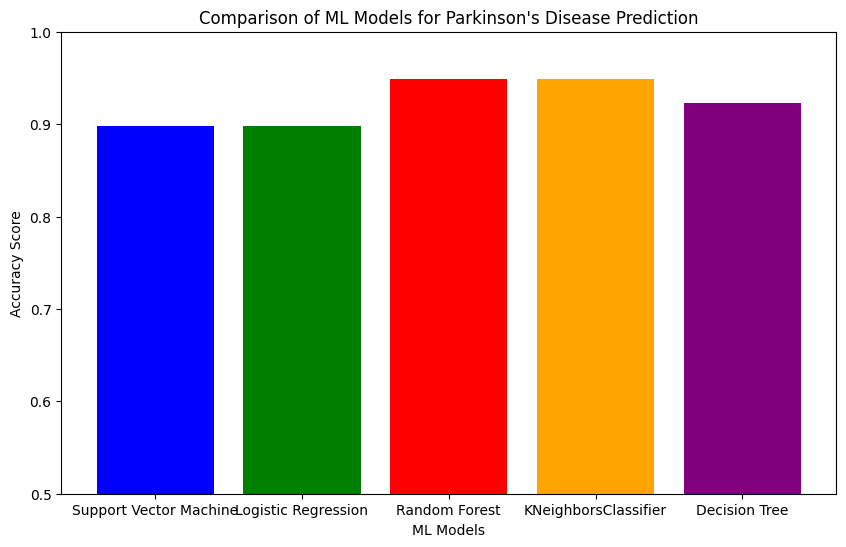

In [33]:
plt.figure(figsize=(10,6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel("ML Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of ML Models for Parkinson's Disease Prediction")
plt.ylim(0.5, 1.0)
plt.show()